## Imports

In [11]:
# Import packages
import pandas as pd
import numpy as np

import scipy.stats as stats
import pingouin as pg

import random
from random import randrange

import matplotlib.pyplot as plt
import seaborn as sns

import Orthoscripts

# Disable chained assignments
pd.options.mode.chained_assignment = None 

#### Import genelists

In [2]:
# Asterias rubens
Astrub = Orthoscripts.readBED("Data/Genelists/Asterias.rubens.genelist.bed")

# Holothuria leucospilota
Holleu = Orthoscripts.readBED("Data/Genelists/Holothuria.leucospilota.genelist.bed")

# Paracentrotus livides
Parliv = Orthoscripts.readBED("Data/Genelists/Paracentrotus.lividus.genelist.bed")

# Branchiostoma lanceolatum
Bralan = Orthoscripts.readBED("Data/Genelists/Branchiostoma.lanceolatum.genelist.bed")

# Branchiostoma floridae
Braflo = Orthoscripts.readBED("Data/Genelists/Branchiostoma.floridae.genelist.bed", 's')

# Marthasterias glacialis
Margla = Orthoscripts.readBED("Data/Genelists/Marthasterias.glacialis.genelist.bed")

# Pecten maximus
Pecmax = Orthoscripts.readBED("Data/Genelists/Pecmax.genelist.bed", 's')

# Stichopus chloronotus
Stichl = Orthoscripts.readBED("Data/Genelists/Stichopus.chloronotus.genelist.bed")

# Amphiura filiformis 
Ampfil = Orthoscripts.readBED("Data/Genelists/Amphiura.filiformis.genelist.bed")

# Ephydatia muelleri
Ephmue = Orthoscripts.readBED("Data/Genelists/Ephydatia.muelleri.genelist.bed", 's')

# Ancestor 
AniAnc = Orthoscripts.readBED("Data/Genelists/AniAnc.genelist.bed", 's')
BilAnc = Orthoscripts.readBED("Data/Genelists/BilAnc.genelist.bed", 's')

#### Import ortholog files

In [3]:
# Import orthologs
Astrub_Holleu = np.loadtxt("Data/Orthologs/Asterias.rubens+Holothuria.leucospilota.txt", dtype = "str")

Astrub_Parliv = np.loadtxt("Data/Orthologs/Asterias.rubens+Paracentrotus.lividus.txt", dtype = "str")

Holleu_Parliv = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Paracentrotus.lividus.txt", dtype = "str")

Margla_Bralan = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Branchiostoma.lanceolatum.txt", dtype = "str")

Margla_Pecmax = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Pecten.maximus.txt", dtype = "str")

Margla_Stichl = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Stichopus.chloronotus.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Data/Orthologs/Pecten.maximus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Bralan = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Pecmax = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Pecten.maximus.txt", dtype = "str")

Pecmax_Holleu = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Holleu_sensitive.txt", dtype = "str")

Holleu_Bralan = np.loadtxt("Orthology pipeline/orthologs/Holleu+Bralan_sensitive.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Bralan_sensitive.txt", dtype = "str")

Pecmax_Braflo = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Braflo_sensitive.txt", dtype = "str")

Holleu_Braflo = np.loadtxt("Orthology pipeline/orthologs/Holleu+Braflo_sensitive.txt", dtype = "str")

Holleu_Ampfil = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Amphiura.filiformis.txt", dtype = "str")

Braflo_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Braflo+Ephmue_sensitive.txt", dtype = "str")

Holleu_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Holleu+Ephmue_sensitive.txt", dtype = "str")

Pecmax_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Ephmue_sensitive.txt", dtype = "str")

#### Sorting out the data

In [4]:
Astrub = Astrub.loc[Astrub['Chromosome'].str.contains('chr')]
Bralan = Bralan.loc[Bralan['Chromosome'].str.contains('BFL_')]
Braflo = Braflo.loc[Braflo['Chromosome'].str.contains('BFL_')]
Pecmax = Pecmax.loc[Pecmax['Chromosome'].str.contains('PYE_')]

# Ephmue genelist: remove suffix
Ephmue['Name'] = Ephmue['Name'].str.rsplit('.t1').str.get(0)

# Parliv genelist: select chromosomal scaffolds
Parliv = Orthoscripts.unscaff(Parliv, 100)
Ampfil = Orthoscripts.unscaff(Ampfil, 100)
Ephmue = Orthoscripts.unscaff(Ephmue, 600)

Astrub_Parliv = Orthoscripts.orthFix(Astrub_Parliv, 'B', 'Parliv_', 1)
Margla_Bralan = Orthoscripts.orthFix(Margla_Bralan, 'A', '.1', 0)
Margla_Stichl = Orthoscripts.orthFix(Margla_Stichl, 'A', '.1', 0)
Margla_Stichl = Orthoscripts.orthFix(Margla_Stichl, 'B', '.1', 0)
Margla_Pecmax = Orthoscripts.orthFix(Margla_Pecmax, 'B', '.1', 0)
Holleu_Ampfil = Orthoscripts.orthFix(Holleu_Ampfil, 'B', '.1', 0)
Holleu_Bralan = Orthoscripts.orthFix(Holleu_Bralan, 'B', '_', 0)

##  
-----

## Plots

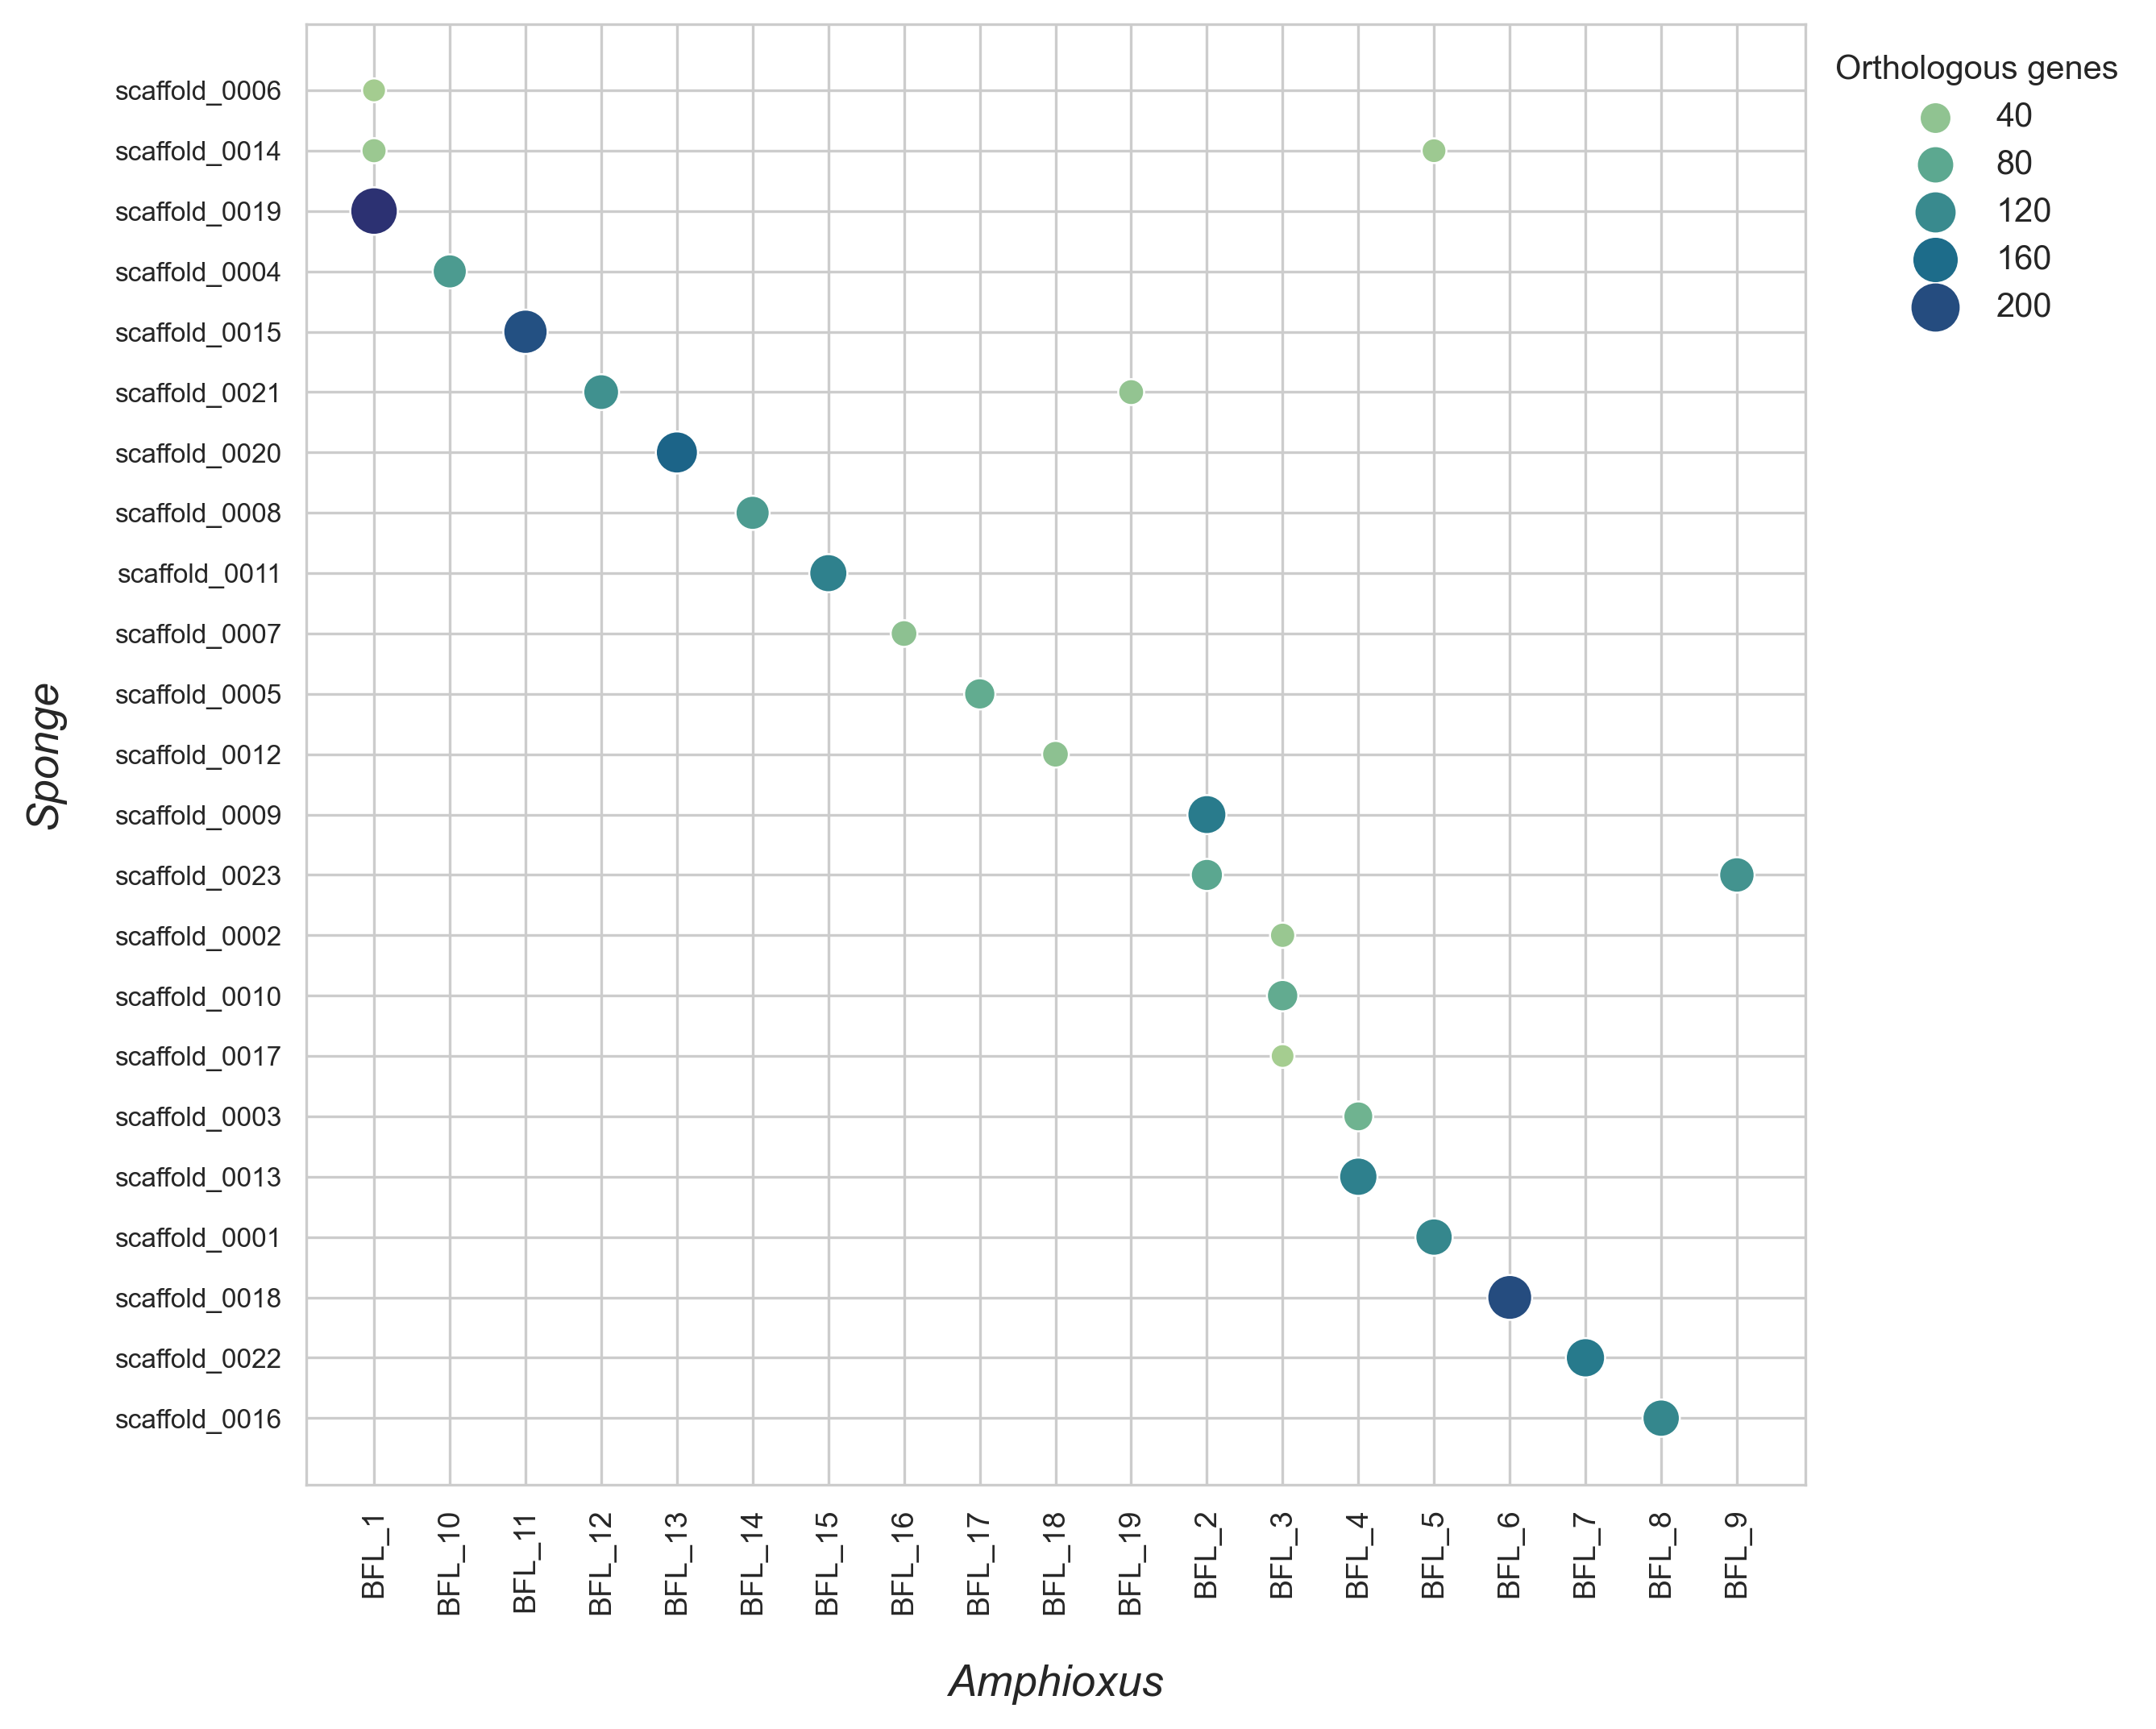

In [30]:
data = Orthoscripts.orthofind(Braflo, Ephmue, Braflo_Ephmue)
Orthoscripts.orthoplot(data, 'Amphioxus', 'Sponge', 'A', 'B')

-----
### Simulations

In [27]:
def makeancestor(Nchr, Ngene):
    ancestor = pd.DataFrame(columns = ['Chr'])
    for i in range(Nchr):
        row = {'Chr' : (i + 1)}
        for i in range(Ngene):
            ancestor = pd.concat([ancestor, pd.DataFrame([row])], ignore_index= True)
    ancestor['Genes'] = (ancestor.reset_index().index + 1)

    return ancestor

Nchr = 20
Ngene = 100
ancestor = makeancestor(Nchr, Ngene)
ancestor

,Chr,Genes
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
1995,20,1996
1996,20,1997
1997,20,1998
1998,20,1999


In [18]:
# Dummy BED files :: type 'anc' for ancestor, 'des' for descendant
def dummyBED(genome, type, outfile):
    if type == 'anc':
        genome['Chr'] = 'AncChr' + genome['Chr'].astype(str)
        genome['Genes'] = 'ancg_' + genome['Genes'].astype(str)
        
    if type == 'des':
        genome['Chr'] = 'Chr' + genome['Chr'].astype(str)
        genome['Genes'] = 'g_' + genome['Genes'].astype(str)
    
    genome['Start'] = np.arange(len(genome))
    genome['End'] = np.arange(len(genome)) + 5
    
    genome = genome[['Chr', 'Start', 'End', 'Genes']]
    
    with open(outfile, 'w') as out:
        out.write(genome.to_string(header = False, index = False))
        
    return genome

# Dummy ortholog file
def dummyOrthologs(genome, outfile):
    
    orthologs = pd.DataFrame()
    
    orthologs['Orthologs'] = np.arange(len(genome)) + 1
    orthologs['speciesA'] = np.arange(len(genome)) + 1
    orthologs['speciesB'] = np.arange(len(genome)) + 1
    
    orthologs['Orthologs'] = 'orthologs_' + orthologs['Orthologs'].astype(str)
    orthologs['speciesA'] = 'ancg_' + orthologs['speciesA'].astype(str)
    orthologs['speciesB'] = 'g_' + orthologs['speciesB'].astype(str)
    
    with open(outfile, 'w') as out:
        out.write(orthologs.to_string(header = False, index = False))

In [28]:
def fusion(ancestor, mixing = 0.5):
    '''
    inputs: 
    ancestor : df with chromosome name | gene name
    mixing : float between 0 and 1, where 1 implies extreme mixing and 0 implies no mixing
    '''
    
    # Randomly select two chromosomes to fuse
    fuse1 = random.choice(range(1, len(ancestor.Chr.unique())))
    fuse2 = random.choice(range(1, len(ancestor.Chr.unique())))
    
    if fuse1 == fuse2: # Just so the same chromosome isn't selected twice
        fuse2 = random.choice(range(1, len(ancestor.Chr.unique())))

    # Fuse the chromosomes
    fusion = ancestor.loc[ancestor['Chr'].isin([fuse1, fuse2])]
    fusion['Chr'] = f'{fuse1}+{fuse2}'
    
    # Apply mixing if required
    if mixing > 0:
        genes = fusion['Genes'].to_numpy()
        n = len(genes)
        for i in range(int(mixing * n)):
            g1, g2 = randrange(n), randrange(n)
            genes[g2], genes[g1] = genes[g1], genes[g2]

        fusion['Genes'] = genes
        fusion['Chr'] = f'{fuse1}x{fuse2}'
        
    
    speciesA = ancestor.copy()
    # Remove the unfused chromosomes
    speciesA.drop(speciesA[speciesA['Chr'].isin([fuse1, fuse2])].index, inplace = True)
    speciesA = pd.concat([speciesA, fusion])
    
    log = f'Fusion of AncChr{fuse1} and AncChr{fuse2} into Chr{fuse1}+{fuse2}'
    
    return speciesA, log

with pd.option_context('display.max_rows', None):
    print(fusion(ancestor))

(      Chr  Genes
0       1      1
1       1      2
2       1      3
3       1      4
4       1      5
5       1      6
6       1      7
7       1      8
8       1      9
9       1     10
10      1     11
11      1     12
12      1     13
13      1     14
14      1     15
15      1     16
16      1     17
17      1     18
18      1     19
19      1     20
20      1     21
21      1     22
22      1     23
23      1     24
24      1     25
25      1     26
26      1     27
27      1     28
28      1     29
29      1     30
30      1     31
31      1     32
32      1     33
33      1     34
34      1     35
35      1     36
36      1     37
37      1     38
38      1     39
39      1     40
40      1     41
41      1     42
42      1     43
43      1     44
44      1     45
45      1     46
46      1     47
47      1     48
48      1     49
49      1     50
50      1     51
51      1     52
52      1     53
53      1     54
54      1     55
55      1     56
56      1     57
57      1    

In [19]:
def fission(ancestor):
    # Randomly select a chromosome for fission
    fiss = random.choice(range(len(ancestor.Chr.unique())))
    fission = ancestor.loc[ancestor['Chr'] == fiss]

    pos = random.choice(range(1, Ngene))

    # Add the new chromosomes back into the genome
    chr1 = fission.iloc[: pos]
    chr1['Chr'] = f'{fiss}_1'
    chr2 = fission.iloc[pos :]
    chr2['Chr'] = f'{fiss}_2'
    
    # Remove the fission chromosome from the genome
    speciesA = pd.concat([ancestor, chr1, chr2])
    speciesA = speciesA[speciesA.Chr != fiss]
    
    log = f'Fission of AncChr{fiss} into Chr{fiss}_1 and Chr{fiss}_2'
    
    return speciesA, log

with pd.option_context('display.max_rows', None):
    print(fission(ancestor))

(       Chr  Genes
0        1      1
1        1      2
2        1      3
3        1      4
4        1      5
5        1      6
6        1      7
7        1      8
8        1      9
9        1     10
10       1     11
11       1     12
12       1     13
13       1     14
14       1     15
15       1     16
16       1     17
17       1     18
18       1     19
19       1     20
20       1     21
21       1     22
22       1     23
23       1     24
24       1     25
25       1     26
26       1     27
27       1     28
28       1     29
29       1     30
30       1     31
31       1     32
32       1     33
33       1     34
34       1     35
35       1     36
36       1     37
37       1     38
38       1     39
39       1     40
40       1     41
41       1     42
42       1     43
43       1     44
44       1     45
45       1     46
46       1     47
47       1     48
48       1     49
49       1     50
50       1     51
51       1     52
52       1     53
53       1     54
54       

In [20]:
def translocation(ancestor):
    # Randomly select two chromosomes for translocation
    cA = random.choice(range(len(ancestor.Chr.unique())))
    cB = random.choice(range(len(ancestor.Chr.unique())))
    
    chrA = ancestor.loc[ancestor['Chr'] == cA]
    chrB = ancestor.loc[ancestor['Chr'] == cB]
    
    # Randomly select two break point positions
    posA = random.choice(range(1, Ngene))
    posB = random.choice(range(1, Ngene))
    
    # Break up the two chromosomes into four fragments
    fragmentA1 = chrA.iloc[: posA]
    fragmentA2 = chrA.iloc[posA :]
    fragmentB1 = chrB.iloc[: posB]
    fragmentB2 = chrB.iloc[posB :]
    
    # Join the fragments to form recombinant chromosomes
    chr1 = fragmentA1.append(fragmentB2)
    chr1['Chr'] = f'{cA};{cB}'
    chr2 = fragmentA2.append(fragmentB1)
    chr2['Chr'] = f'{cA};{cB}'
    
    # Remove the original chromosomes from the genome
    speciesA = ancestor.append([chr1, chr2])
    
    speciesA = speciesA[speciesA.Chr != cA]
    speciesA = speciesA[speciesA.Chr != cB]
    
    log = f'Translocation between AncChr{cA} and AncChr{cB}'
    
    return speciesA, log

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(translocation(ancestor))

(      Chr  Genes
100     2    101
101     2    102
102     2    103
103     2    104
104     2    105
105     2    106
106     2    107
107     2    108
108     2    109
109     2    110
110     2    111
111     2    112
112     2    113
113     2    114
114     2    115
115     2    116
116     2    117
117     2    118
118     2    119
119     2    120
120     2    121
121     2    122
122     2    123
123     2    124
124     2    125
125     2    126
126     2    127
127     2    128
128     2    129
129     2    130
130     2    131
131     2    132
132     2    133
133     2    134
134     2    135
135     2    136
136     2    137
137     2    138
138     2    139
139     2    140
140     2    141
141     2    142
142     2    143
143     2    144
144     2    145
145     2    146
146     2    147
147     2    148
148     2    149
149     2    150
150     2    151
151     2    152
152     2    153
153     2    154
154     2    155
155     2    156
156     2    157
157     2    

In [21]:
def synteny_loss(ancestor):
    syn = random.choice(range(len(ancestor.Chr.unique())))
    synchr = ancestor.loc[ancestor['Chr'] == syn]

    speciesA = ancestor[ancestor.Chr != syn]
    
    # Assign all elements to a random chromosome
    synchr['Chr'] = random.choices(ancestor.Chr.unique(), k = len(synchr))
    
    # Add back into the genome
    speciesA = speciesA.append(synchr)
    
    log = f'Synteny loss of AncChr{syn}'

    return speciesA

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(synteny_loss(ancestor))

     Chr  Genes
0      1      1
1      1      2
2      1      3
3      1      4
4      1      5
5      1      6
6      1      7
7      1      8
8      1      9
9      1     10
10     1     11
11     1     12
12     1     13
13     1     14
14     1     15
15     1     16
16     1     17
17     1     18
18     1     19
19     1     20
20     1     21
21     1     22
22     1     23
23     1     24
24     1     25
25     1     26
26     1     27
27     1     28
28     1     29
29     1     30
30     1     31
31     1     32
32     1     33
33     1     34
34     1     35
35     1     36
36     1     37
37     1     38
38     1     39
39     1     40
40     1     41
41     1     42
42     1     43
43     1     44
44     1     45
45     1     46
46     1     47
47     1     48
48     1     49
49     1     50
50     1     51
51     1     52
52     1     53
53     1     54
54     1     55
55     1     56
56     1     57
57     1     58
58     1     59
59     1     60
60     1     61
61     1

In [29]:
ancestor = makeancestor(Nchr, Ngene)
speciesA = ancestor.copy(deep = True)
events = {}
for event in range(20):
    r = np.random.uniform()
    
    if r <= 0.40:
        if len(ancestor) < 2: continue
        speciesA, log = fission(speciesA)
        events['EVENT_' + str(event + 1)] = log
        print(log)
    
    elif r <= 0.70:
        speciesA, log = fusion(speciesA)
        events['EVENT_' + str(event + 1)] = log
        print(log)
    
    else:
        speciesA, log = fusion(speciesA, mixing = 0.5)
        events['EVENT_' + str(event + 1)] = log
        print(log)
        continue

Fusion of AncChr7 and AncChr9 into Chr7+9
Fusion of AncChr16 and AncChr12 into Chr16+12
Fusion of AncChr3 and AncChr5 into Chr3+5
Fusion of AncChr16 and AncChr6 into Chr16+6
Fission of AncChr5 into Chr5_1 and Chr5_2
Fusion of AncChr15 and AncChr1 into Chr15+1
Fusion of AncChr11 and AncChr9 into Chr11+9
Fusion of AncChr12 and AncChr5 into Chr12+5
Fusion of AncChr13 and AncChr1 into Chr13+1
Fusion of AncChr1 and AncChr5 into Chr1+5
Fusion of AncChr3 and AncChr12 into Chr3+12
Fusion of AncChr9 and AncChr8 into Chr9+8
Fusion of AncChr4 and AncChr13 into Chr4+13
Fission of AncChr12 into Chr12_1 and Chr12_2
Fission of AncChr5 into Chr5_1 and Chr5_2
Fission of AncChr11 into Chr11_1 and Chr11_2
Fusion of AncChr1 and AncChr7 into Chr1+7
Fission of AncChr1 into Chr1_1 and Chr1_2
Fission of AncChr1 into Chr1_1 and Chr1_2
Fusion of AncChr11 and AncChr7 into Chr11+7


------------------------------

### Test simulations

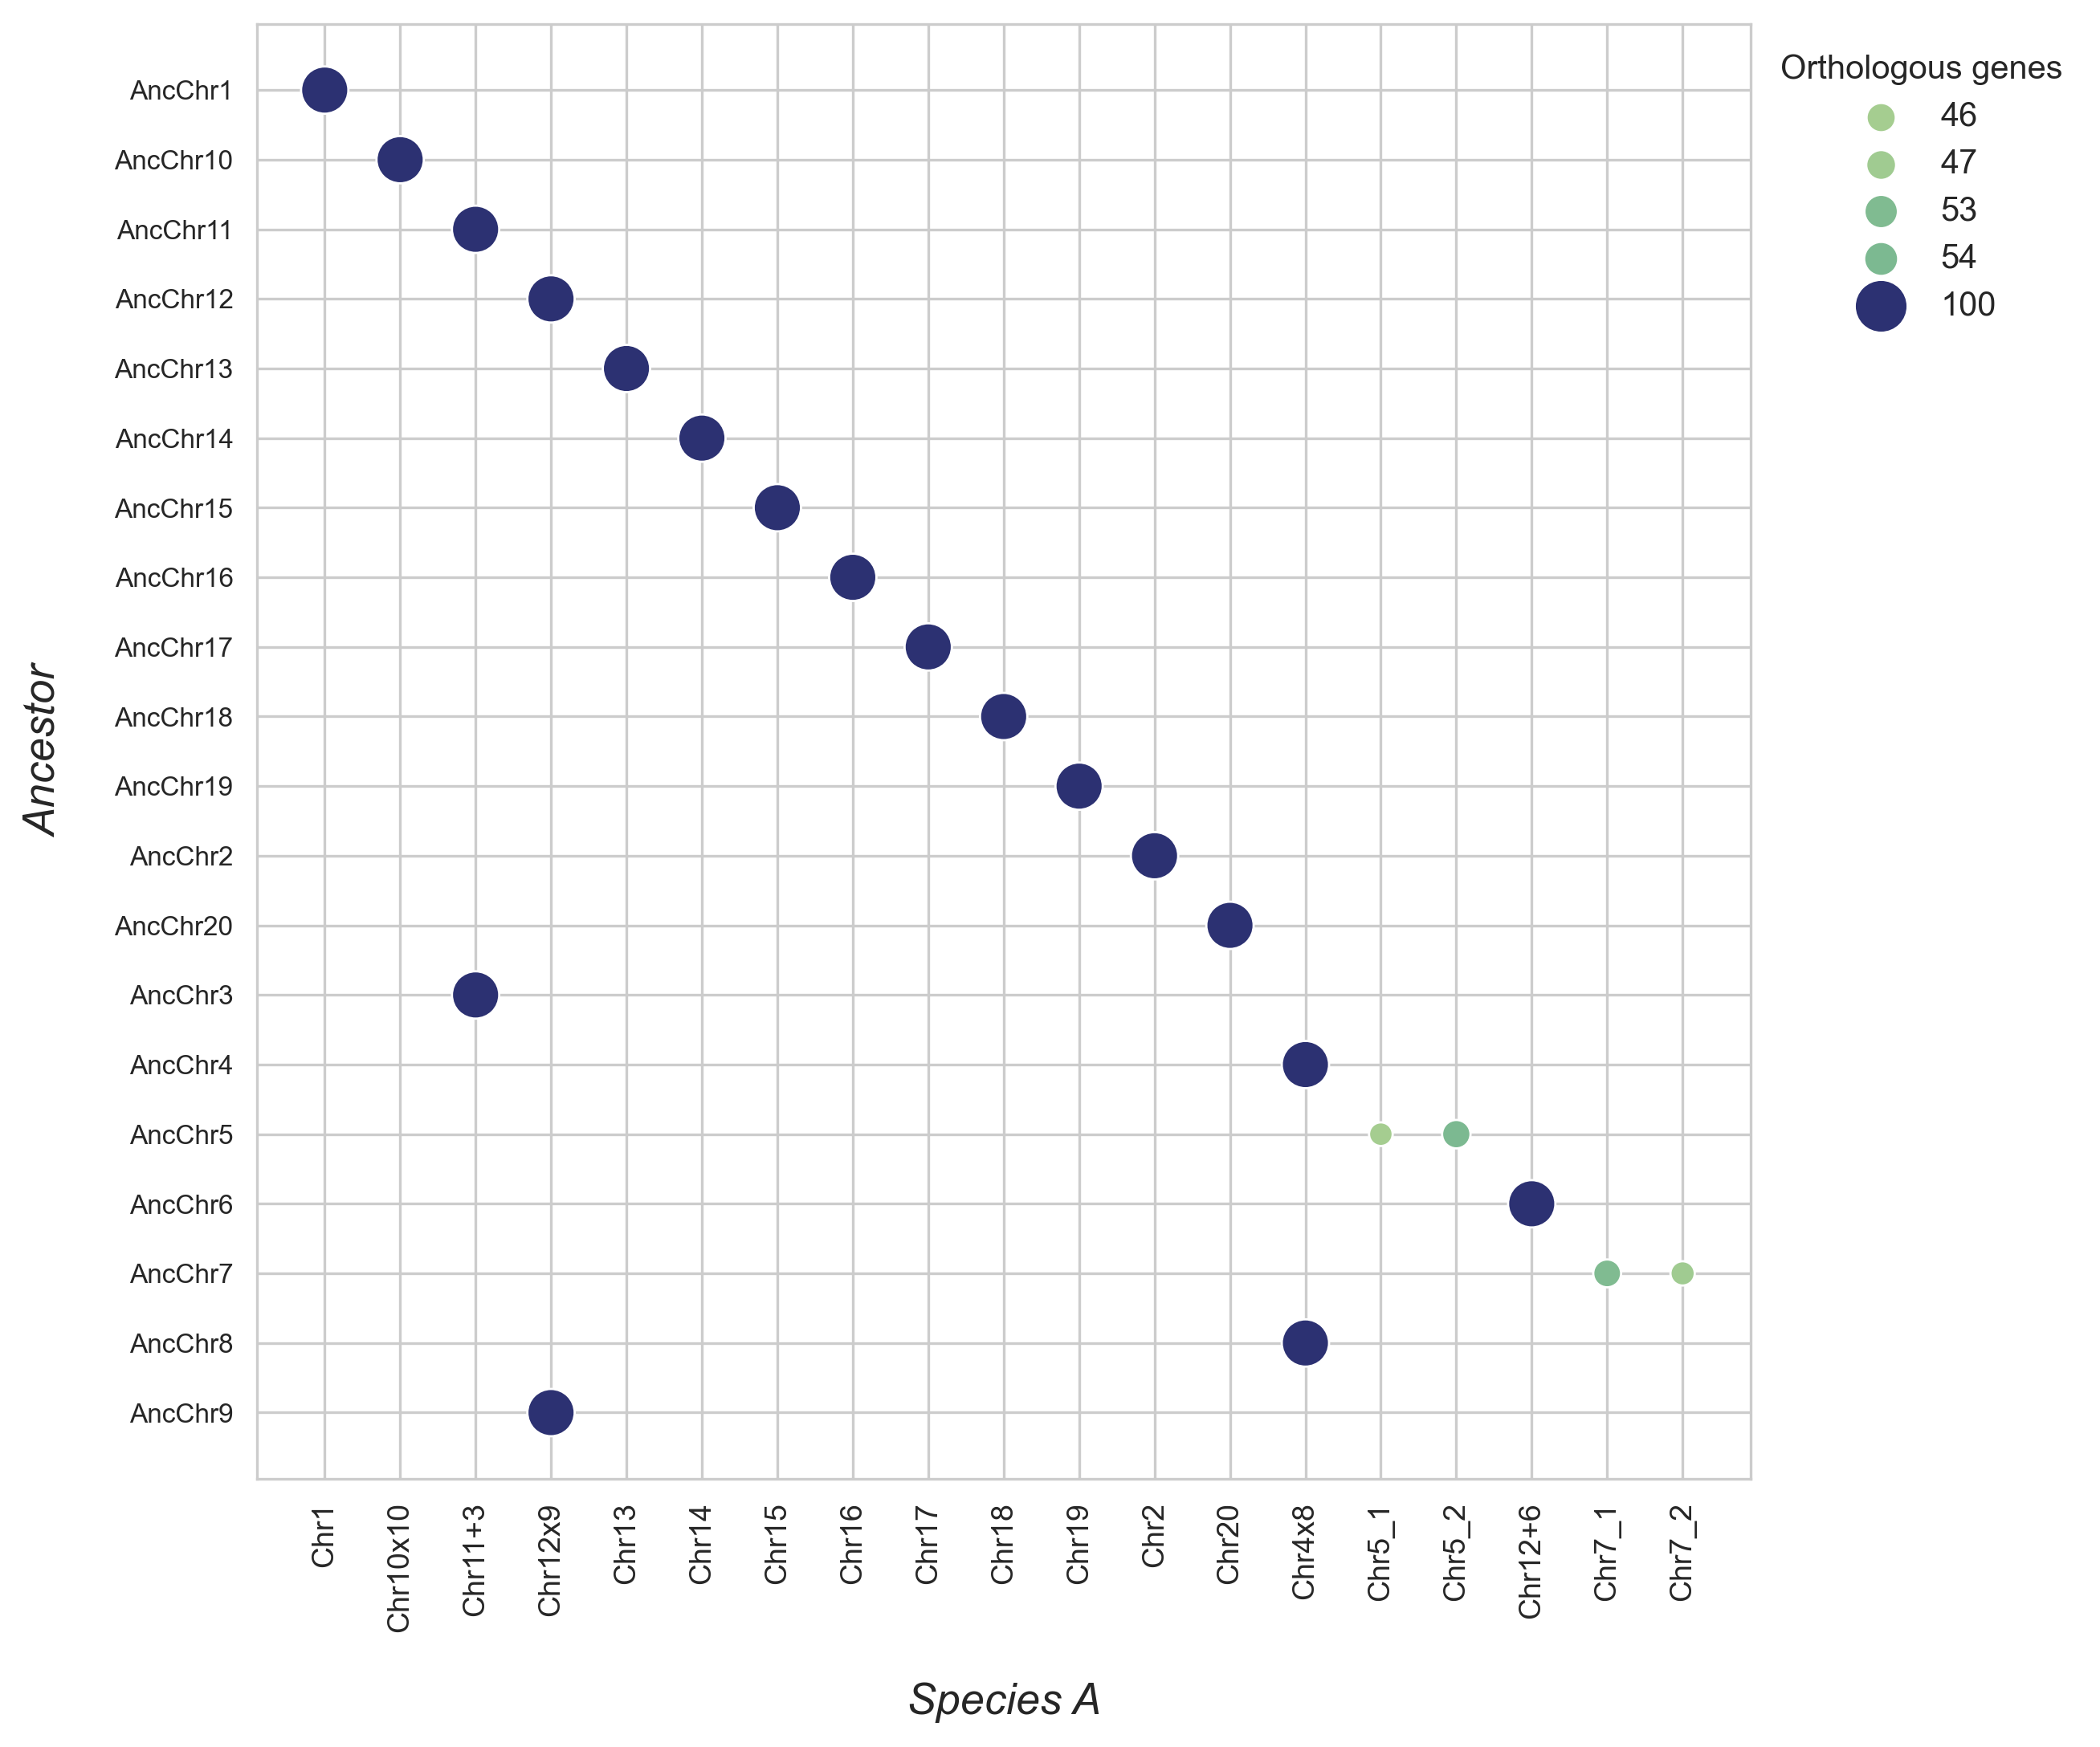

In [41]:
# Import 
anc = Orthoscripts.readBED("Simulations/Ancestor.genelist.bed", 's')
spA = Orthoscripts.readBED("Simulations/SpeciesA.genelist.bed", 's')
orth = np.loadtxt("Simulations/Ancestor+SpeciesA.txt", dtype = "str")

simO = Orthoscripts.orthofind(anc, spA, orth)

Orthoscripts.orthoplot(simO, 'Species A', 'Ancestor', 'B', 'A')

In [42]:
Orthoscripts.rearrangements(simO)

Fission of ancestral chromosome AncChr5 into ['Chr5_1', 'Chr5_2']
Fission of ancestral chromosome AncChr7 into ['Chr7_1', 'Chr7_2']
Fusion of ancestral chromosomes ['AncChr11', 'AncChr3'] into Chr11+3
Fusion of ancestral chromosomes ['AncChr12', 'AncChr9'] into Chr12x9
Fusion of ancestral chromosomes ['AncChr4', 'AncChr8'] into Chr4x8


In [40]:
fusions = data.pivot(index = 'B', columns='A', values = 'Orthologs')
fusions = fusions.loc[(fusions.where(fusions.isnull(), 1).sum(axis=1) > 1) | (fusions.sum(axis=0) > 1)]
fusions = fusions.stack(dropna = True).reset_index().groupby('B')['A'].apply(list).reset_index(name = 'A')
fusions

,B,A
0,scaffold_0014,"[BFL_1, BFL_5]"
1,scaffold_0021,"[BFL_12, BFL_19]"
2,scaffold_0023,"[BFL_2, BFL_9]"
